

        rank: The ranking of the billionaire in terms of wealth.
        finalWorth: The final net worth of the billionaire in U.S. dollars.
        category: The category or industry in which the billionaire's business operates.
        personName: The full name of the billionaire.
        age: The age of the billionaire.
        country: The country in which the billionaire resides.
        city: The city in which the billionaire resides.
        source: The source of the billionaire's wealth.
        industries: The industries associated with the billionaire's business interests.
        countryOfCitizenship: The country of citizenship of the billionaire.
        organization: The name of the organization or company associated with the billionaire.
        selfMade: Indicates whether the billionaire is self-made (True/False).
        status: "D" represents self-made billionaires (Founders/Entrepreneurs) and "U" indicates inherited or unearned wealth.
        gender: The gender of the billionaire.
        birthDate: The birthdate of the billionaire.
        lastName: The last name of the billionaire.
        firstName: The first name of the billionaire.
        title: The title or honorific of the billionaire.
        date: The date of data collection.
        state: The state in which the billionaire resides.
        residenceStateRegion: The region or state of residence of the billionaire.
        birthYear: The birth year of the billionaire.
        birthMonth: The birth month of the billionaire.
        birthDay: The birth day of the billionaire.
        cpi_country: Consumer Price Index (CPI) for the billionaire's country.
        cpi_change_country: CPI change for the billionaire's country.
        gdp_country: Gross Domestic Product (GDP) for the billionaire's country.
        gross_tertiary_education_enrollment: Enrollment in tertiary education in the billionaire's country.
        gross_primary_education_enrollment_country: Enrollment in primary education in the billionaire's country.
        life_expectancy_country: Life expectancy in the billionaire's country.
        tax_revenue_country_country: Tax revenue in the billionaire's country.
        total_tax_rate_country: Total tax rate in the billionaire's country.
        population_country: Population of the billionaire's country.
        latitude_country: Latitude coordinate of the billionaire's country.
        longitude_country: Longitude coordinate of the billionaire's country.




## 0. Objectives:

> I always got amazed about some people achieving a billion dollar in wealth, because for the majority of people, achieving such amount is a combination of various factors that can be both luck, intelligence and creating. When I first saw this dataset, I had a glympse about finding the best predictions and conditions that might be favorable for some places, industries, coountries, etc. This is why I made this notebook.

## 1. The start:

### 1.1 Importing the main libs:

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import numpy as np
from plotly.subplots import make_subplots
import plotly.graph_objects as go

### 1.2 Importing the main file:

In [2]:
df_full_billionaires = pd.read_csv('/content/Billionaires Statistics Dataset.csv',
                                   sep = ',')
df_full_billionaires.columns

Index(['rank', 'finalWorth', 'category', 'personName', 'age', 'country',
       'city', 'source', 'industries', 'countryOfCitizenship', 'organization',
       'selfMade', 'status', 'gender', 'birthDate', 'lastName', 'firstName',
       'title', 'date', 'state', 'residenceStateRegion', 'birthYear',
       'birthMonth', 'birthDay', 'cpi_country', 'cpi_change_country',
       'gdp_country', 'gross_tertiary_education_enrollment',
       'gross_primary_education_enrollment_country', 'life_expectancy_country',
       'tax_revenue_country_country', 'total_tax_rate_country',
       'population_country', 'latitude_country', 'longitude_country'],
      dtype='object')

In [3]:
def format_values(x):
    return '{:.0f}'.format(x / 1)

pd.options.display.float_format = format_values
pd.set_option("mode.copy_on_write", True)

### 1.3 Selecting the main columns:

In [4]:
main = df_full_billionaires[['finalWorth', 'category', 'age', 'country',
                             'city', 'life_expectancy_country', 'selfMade', 'population_country',
                             'status', 'gender', 'cpi_country','total_tax_rate_country']]

> I tried to extract informations of another columns but most of them have NA values or they have no value at all.

In [5]:
main.head(3)

,finalWorth,category,age,country,city,life_expectancy_country,selfMade,population_country,status,gender,cpi_country,total_tax_rate_country
0,211000,Fashion & Retail,74,France,Paris,82,False,67059887,U,M,110,61
1,180000,Automotive,51,United States,Austin,78,True,328239523,D,M,117,37
2,114000,Technology,59,United States,Medina,78,True,328239523,D,M,117,37


In [6]:
main.shape

(2640, 12)

### 1.4 Checking null values in major columns:

In [7]:
for cols in main.columns:
  selected_col = main[cols].isnull().sum()
  if  selected_col >= 1:
    print(f'{cols} : {selected_col}')

age : 65
country : 38
city : 72
life_expectancy_country : 182
population_country : 164
cpi_country : 184
total_tax_rate_country : 182


>> Since our main goal is to differentiate the youngest billionaires from the others, we need to remove the ones who doesn't have the age in the dataset.

In [8]:
main.dropna(subset = 'age',
               inplace = True)

### 1.5 Creating categories of ages:

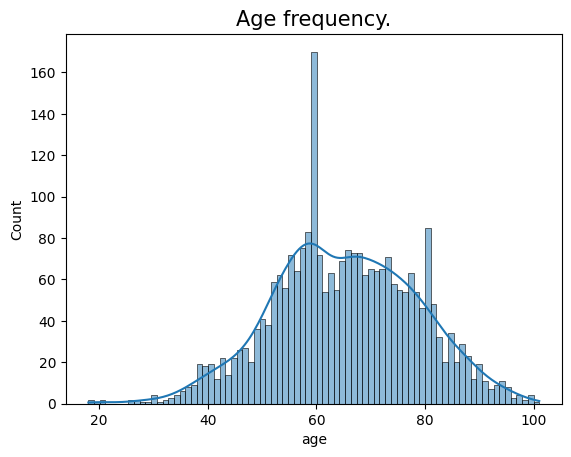

In [9]:
fig_age = sns.histplot(main,
                       x = 'age',
                       bins = main.age.value_counts().shape[0],  # there's 79 different ages in the dataset
                       stat ='count',
                       kde = True)
fig_age.set_title("Age frequency.",
                  fontdict= {'fontsize': 15});


In [10]:
bins = [1,51,61,76,111]
labels = [1,2,3,4]
main.loc[:, 'age_group'] = pd.cut(main.age, bins = bins, labels = labels, include_lowest = True, right = False)

In [11]:
main.age_group.astype('category').dtypes

CategoricalDtype(categories=[1, 2, 3, 4], ordered=True, categories_dtype=int64)

In [12]:
main.groupby('age_group', observed = False).age_group.count()

,age_group
age_group,
1,324
2,679
3,973
4,599


>  Even that someone with 50 years old might not be considered "young", a billionaire is someone that has been investing and/or growing his bussiness for multiple decades, achieving this immense wealth at a older age. Therefore, in this scale, a person in their 40's can be considered young in this "bubble". (Thus, if we increase this threshold, the sample size will be more larger, making it difficult to make predictions and analysis).

### 1.6 Creating a categorical column of industries:

> Group each category business to a number (which we'll call ID):

In [13]:
list_category = main.category.unique()


number_to_cat = {category: idx+1
                 for idx, category in enumerate(list_category)}

main['id_category'] = main['category'].map(number_to_cat)

In [14]:
for k,v in number_to_cat.items():
  print(f'{k}: {v}')

Fashion & Retail: 1
Automotive: 2
Technology: 3
Finance & Investments: 4
Media & Entertainment: 5
Telecom: 6
Diversified: 7
Food & Beverage: 8
Logistics: 9
Gambling & Casinos: 10
Manufacturing: 11
Real Estate: 12
Metals & Mining: 13
Energy: 14
Healthcare: 15
Service: 16
Construction & Engineering: 17
Sports: 18


> **Plotting a bar graph to see the most common business among billionaires**

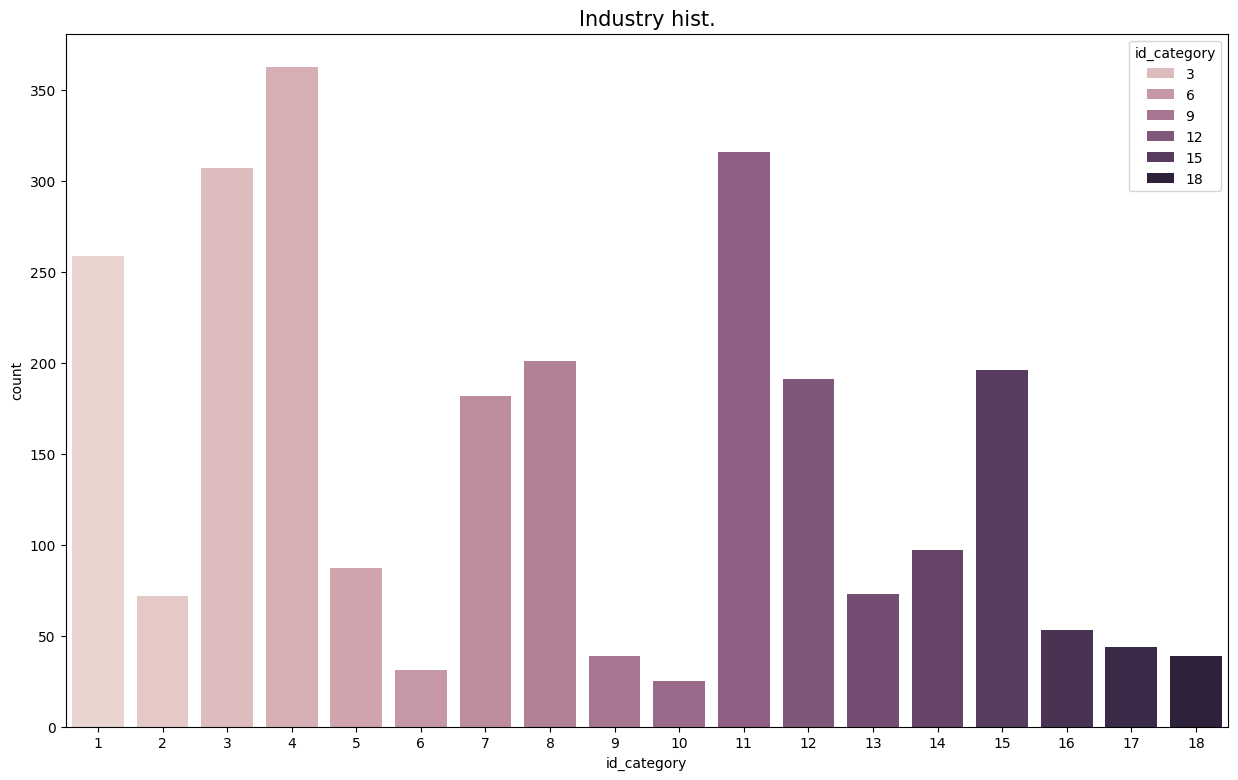

In [15]:
fig_category, axes = plt.subplots(figsize= (15,9))

sns.countplot(x = 'id_category',
              data = main,
              hue = 'id_category')
axes.set_title('Industry hist.',
               fontdict = {'fontsize' : 15});


### 1.7 The young and the old billionaires datasets:

In [16]:
young_dataset = main.loc[main.age_group == 1]
young_dataset.groupby('category').category.count()

,category
category,
Automotive,7
Construction & Engineering,4
Diversified,12
Energy,4
Fashion & Retail,36
Finance & Investments,43
Food & Beverage,19
Gambling & Casinos,2
Healthcare,19


In [17]:
old_dataset = main.loc[(main.age_group == 2) |
                       (main.age_group == 3) |
                       (main.age_group == 4)]

In [18]:
country_values_old = old_dataset.groupby('country').country.value_counts().reset_index()
country_values_old = country_values_old.set_index('country')['count'].to_dict()

country_values_young = young_dataset.groupby('country').country.value_counts().reset_index()
country_values_young = country_values_young.set_index('country')['count'].to_dict()

In [19]:
old_dataset.loc[:, 'billionaires_in_the_country'] = old_dataset.loc[:, 'country'].map(country_values_old)
old_dataset.loc[:, 'proportion'] = old_dataset.loc[:, 'population_country'] / old_dataset.loc[:, 'billionaires_in_the_country']

young_dataset.loc[:, 'billionaires_in_the_country'] = young_dataset.loc[:, 'country'].map(country_values_young)
young_dataset.loc[:, 'proportion'] = young_dataset.loc[:, 'population_country'] / young_dataset.loc[:, 'billionaires_in_the_country']

In [20]:
old_dataset.head(1)

,finalWorth,category,age,country,city,life_expectancy_country,selfMade,population_country,status,gender,cpi_country,total_tax_rate_country,age_group,id_category,billionaires_in_the_country,proportion
0,211000,Fashion & Retail,74,France,Paris,82,False,67059887,U,M,110,61,3,1,32,2095621


In [21]:
young_dataset.head(1)

,finalWorth,category,age,country,city,life_expectancy_country,selfMade,population_country,status,gender,cpi_country,total_tax_rate_country,age_group,id_category,billionaires_in_the_country,proportion
11,79200,Technology,50,United States,Palo Alto,78,True,328239523,D,M,117,37,1,3,94,3491910


## 2. Old vs young:

Trying to find patterns in the variables and  which one of them give us the best conclusions.

In [22]:
top_cities = old_dataset.groupby('city').city.value_counts().reset_index(drop = False).sort_values(by = 'count',  ascending = False)
top_cities = top_cities.reset_index(drop = True).rename(columns = {'count' : 'quantity'})
top_cities = top_cities.head(15)

top_young_cities = young_dataset.groupby('city').city.value_counts().reset_index(drop = False).sort_values(by = 'count', ascending = False)
top_young_cities = top_young_cities.reset_index(drop = True).rename(columns = {'count' : 'quantity'})
top_young_cities = top_young_cities.head(15)

top_countries = old_dataset.groupby('country').country.value_counts().reset_index(drop = False).sort_values(by = 'count',  ascending = False)
top_countries = top_countries.reset_index(drop = True).rename(columns = {'count' : 'quantity'})
top_countries = top_countries.head(15)

top_young_countries = young_dataset.groupby('country').country.value_counts().reset_index(drop = False).sort_values(by = 'count', ascending = False)
top_young_countries = top_young_countries.reset_index(drop = True).rename(columns = {'count' : 'quantity'})
top_young_countries = top_young_countries.head(15)

### 2.1 Top 15 cities:

In [23]:
fig = make_subplots(rows = 1,
                    cols = 2)

graph_0 = go.Bar(x = top_countries.country,
                 y = top_countries.quantity,
                 name = 'Older billionaires')
graph_1 = go.Bar(x = top_young_countries.country,
                 y = top_young_countries.quantity,
                 name = 'Younger billionaires')



fig.add_trace(graph_0,
              row = 1,
              col = 1)
fig.add_trace(graph_1,
              row = 1,
              col = 2)

fig.data[0].marker.color = 'green'

fig.update_layout(height=600,
                  width=1200,
                  title = dict(text = 'Top countries comparison',
                               x = 0.5,
                               font = dict(color = 'blue',
                                           size = 20)))

fig.show()

### 2.2 Top 15 countries:

> The city of San Francisco is the only one that can be highlighted. The rest can be very proportional.

In [24]:
# @title
fig = make_subplots(rows = 1,
                    cols = 2)

graph_0 = go.Bar(x = top_cities.city,
                 y = top_cities.quantity,
                 name = 'Older billionaires')
graph_1 = go.Bar(x = top_young_cities.city,
                 y = top_young_cities.quantity,
                 name = 'Younger billionaires')



fig.add_trace(graph_0,
              row = 1,
              col = 1)
fig.add_trace(graph_1,
              row = 1,
              col = 2)

fig.data[0].marker.color = 'green'

fig.update_layout(height=600,
                  width=1200,
                  title = dict(text = 'Top cities comparison',
                               x = 0.5,
                               font = dict(color = 'blue',
                                           size = 20)))

fig.show()

### 2.3 Self-Made vs Non Self-Mades:

In [25]:
# @title
fig = make_subplots(rows = 1,
                    cols = 2)

graph_0 = go.Histogram(x = old_dataset['selfMade'],
                       name = 'For older billionaires')
graph_1 = go.Histogram(x = young_dataset['selfMade'],
                       name = 'For  young billionaires')

fig.add_trace(graph_0,
              row = 1,
              col = 1)
fig.add_trace(graph_1,
              row = 1,
              col = 2)

fig.data[0].marker.color = 'green'

fig.update_layout(height=600,
                  width=1200,
                  title = dict(text = 'Self-Made Graph',
                               x = 0.5,
                               font = dict(color = 'blue',
                                           size = 20)))

fig.show()

### 2.4 Gender:

In [26]:
# @title
fig = make_subplots(rows = 1,
                    cols = 2)

graph_0 = go.Histogram(x = old_dataset.gender,
                       name = 'Gender (M/F) of old billionaires')
graph_1 = go.Histogram(x = young_dataset.gender,
                       name = 'Gender (M/F) of billionaires below 50 years old')

fig.add_trace(graph_0,
              row = 1,
              col = 1)

fig.add_trace(graph_1,
              row = 1,
              col = 2)

fig.data[0].marker.color = 'green'

fig.update_layout(height=600,
                  width=1200,
                  title = dict(text = 'Sex (M/F) comparison',
                               x = 0.5,
                               font = dict(color = 'blue',
                                           size = 20)))

fig.show()

### 2.5 Secondary analysis:

> The correlations seems to be almost equal.

- The higher a CPI Index is for a country, the lower is the purchase power of the people in it.

- If the CPI Index is of a country is high, the population can't afford to live a good - and healthier - lifestyle.

- Lower proportions of 'population/qt_billionaires' can be a good sign of a county's abundant and prosperous economy.

In [27]:
cpi_relation_young = young_dataset[['cpi_country', 'proportion', 'life_expectancy_country', 'total_tax_rate_country']].drop_duplicates()
cpi_relation_old = old_dataset[['cpi_country', 'proportion', 'life_expectancy_country', 'total_tax_rate_country']].drop_duplicates()

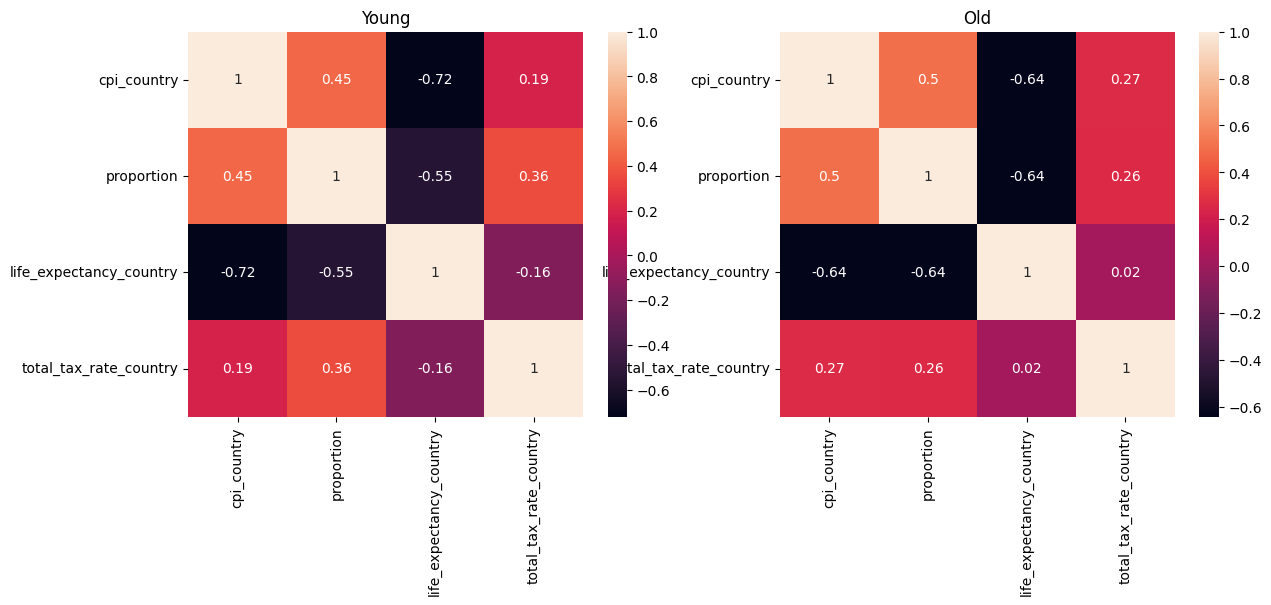

In [28]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (14,5))
sns.heatmap(cpi_relation_young.corr(), annot = True, ax = axes[0])
axes[0].set_title('Young')
sns.heatmap(cpi_relation_old.corr(), annot = True, ax = axes[1])
axes[1].set_title('Old')
fig.show()

>> Notes: For the "self-made" and "gender" columns, there is not a bigger difference in the datasets.

## 3. Insights:

###  3.1 1st analysis:
 Young billionaires are more common in the 'tecnology' field, followed by 'finance and investments' and 'fashion & retail'.

In [29]:
fig_catwithage  = px.bar(main.sort_values(by = 'age_group'),
                         x = 'category',
                         color = 'age_group',
                         title = 'Relation between business and age',
                         height = 800)
fig_catwithage

### 3.2  2nd analysis:
The most common field are the ones with billionaires that created their own wealth.

In [30]:
fig_selfmadecategory_young = px.bar(young_dataset.sort_values(by = 'category'),
                              x = 'category',
                              color = 'selfMade',
                              title = 'Category and inherited wealth relation - YOUNG',
                              height = 800)
fig_selfmadecategory_young

In [31]:
fig_selfmadecategory_old = px.bar(old_dataset.sort_values(by = 'category'),
                              x = 'category',
                              color = 'selfMade',
                              title = 'Category and inherited wealth relation - OLD',
                              height = 800)
fig_selfmadecategory_old

> > 3 sectors in the 'young' datasets have over 50% of the values, meanwhile, the 'old' ones has more distribution.  





### 3.3 3rd analysis:
> Countries with tax rate below 40% usually don't have a proportion bigger than 20 millions (population by country / quantity of young billionaires )

In [32]:
fig = px.scatter_3d(young_dataset, x = 'proportion', y = 'life_expectancy_country', z = 'cpi_country', color = 'total_tax_rate_country')
fig.show()

## +Conclusions:

> With the technological boom in the early 2000's, a lot of young programmers revolutionizes the worldby creating tecnology companies. This fact can also show that, proportionally, over 80% of those prodigies are self-made.

> Other industries like "Diversified (portfolio)", "Real State" and "Engineering", which can take a lot of time to take huge amount of profit (especially in today's age, because for a new entrepreneur it's harder than it was over 50 years ago and the prices of houses today is more expensive), a big portion of those young success already had a wealthy family.

> Other variables and insights are very balanced for both datasets, with minimal differences in correlations, proportions and total samples.